169001437/169001437 [==============================] - 6s 0us/step


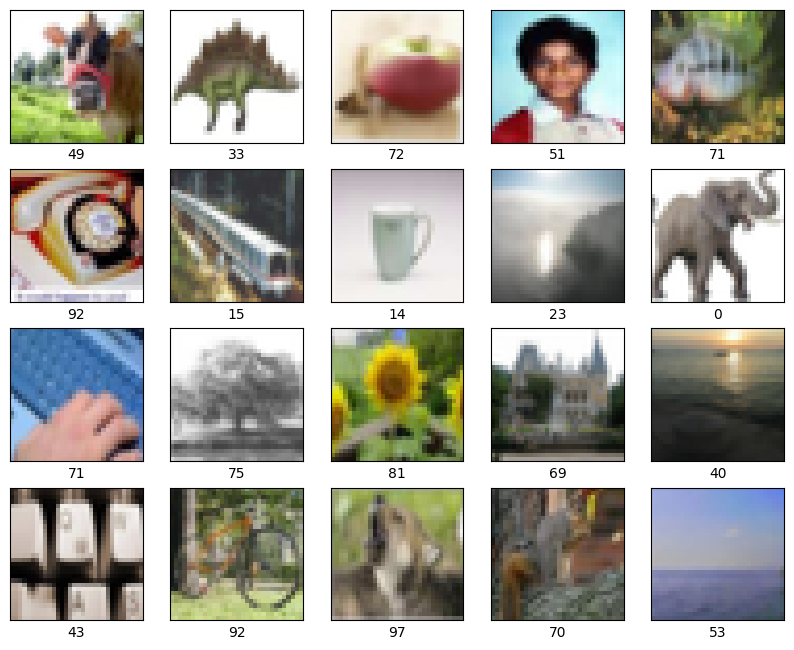

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 3)         39        
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 3)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          832       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          16448     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 64)          0

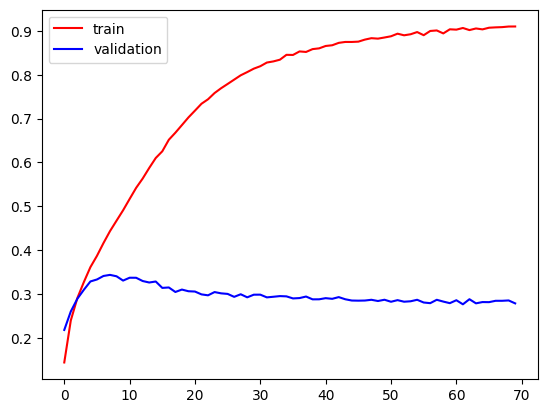

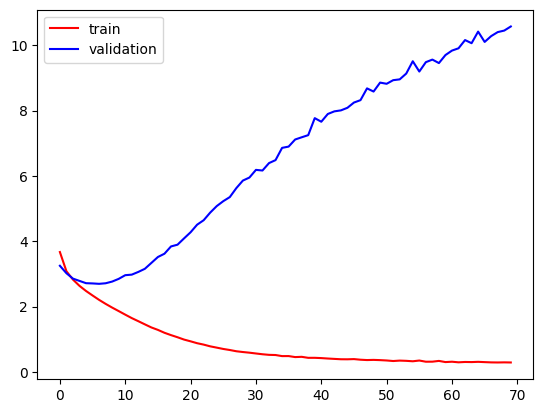

In [1]:
#Question-1
from keras import datasets,Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,BatchNormalization,Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


(xtr,ytr),(xt,yt)=datasets.cifar100.load_data()
ytr=ytr.reshape(-1,)
yt=yt.reshape(-1,)
plt.figure(figsize=(10,10))
for image in range(0,20):
  i=image
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  j=i+0
  data_plot=xtr[j]
  plt.imshow(data_plot)
  plt.xlabel(str(yt[j]))
plt.show()

xtr=xtr/255
xt=xt/255
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(xtr)
model=Sequential()
model.add(Conv2D(input_shape=(32,32,3),kernel_size=(2,2),padding='same',strides=(2,2),filters=3))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1),padding='same'))

model.add(Conv2D(kernel_size=(2,2),padding='same',strides=(2,2),filters=64))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1),padding='same'))

model.add(Conv2D(kernel_size=(2,2),padding='same',strides=(2,2),filters=64))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1),padding='same'))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(100,activation='softmax'))

model.summary()
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(xtr,ytr,epochs=70,validation_data=(xt,yt))

test_loss,test_acc=model.evaluate(xt,yt)
print("test accuracy:",test_acc)
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()